## 04 Core

This notebook explains each function in the core module. These functions perform the line of sight derivation.

In [1]:
# import modules
import convenience as con
import support as sup
import core as cor
import numpy as np

from astropy.constants import au

# Point to test data, and create list of total brightness and polarized brightness image pair
tb_base_fits="./test_data/stereo/20121109_000915_B_base.fts"
pb_base_fits="./test_data/stereo/20121109_000915_pB_base.fts"

tb_fits="./test_data/stereo/20121109_030915_B.fts"
pb_fits="./test_data/stereo/20121109_030915_pB.fts"

base_fits_file_list=[tb_base_fits, pb_base_fits]
fits_file_list=[tb_fits, pb_fits]

### Function : radial_position_ps

The function radial_position_ps accepts a total brighness and polarized brightness image arrays (preferabbly process using the convenience funtions described in doc_03_support), a distance image map (the distance of each pixel from the center of the sun, also described in doc_03_support) and a distance from the observer to the source, the sun. 

The function returns r_plus, r_minus as ndarrays, these are heliocentric radial distances of the foreground (+) and background (-) solutions, and have the same shape as the input arrays.
It also returns l_plus, l_minus ndarrays, which are Line-of-sight distances from the observer to the feature (foreground and background). tau_plus, tau_minus ndarrays, which are LOS angles from the Thomson surface for the + and - solutions. Finally, it returns x_plus, x_minus ndarrays which are Distances from the plane of the sky along the Sun–observer axis for the + and - solutions (x = 0 at the POS; x > 0 in front of the POS).

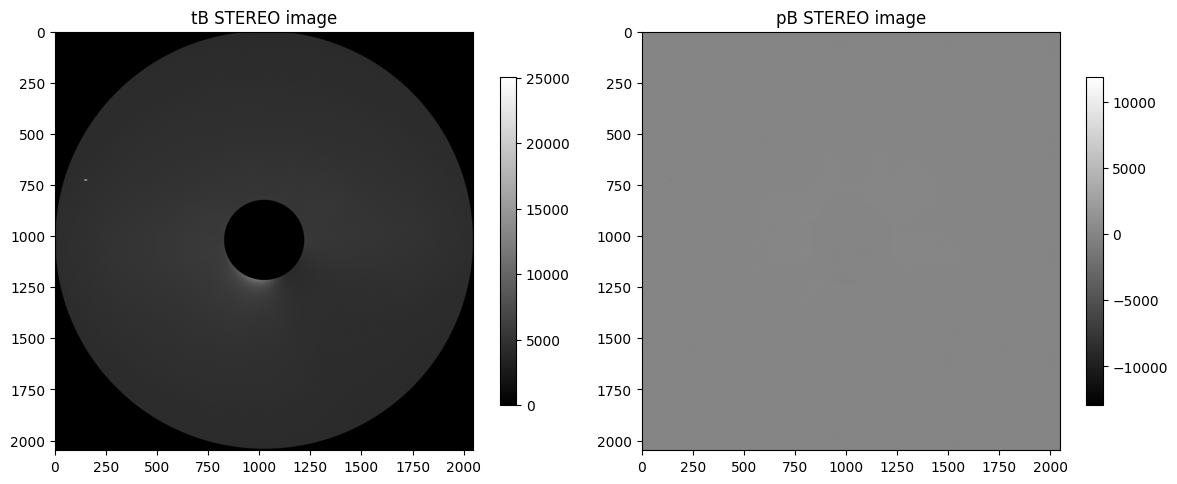

In [2]:
# import some data using import_data (see doc_03_support)
tb_data, pB_data, tb_header, pb_header = sup.import_data(fits_file_list)

# view tB, pB pair, both have been masked by default (see doc_02_convenience)
con.show_2_images(tb_data, pB_data,  title1="tB STEREO image", title2="pB STEREO image")

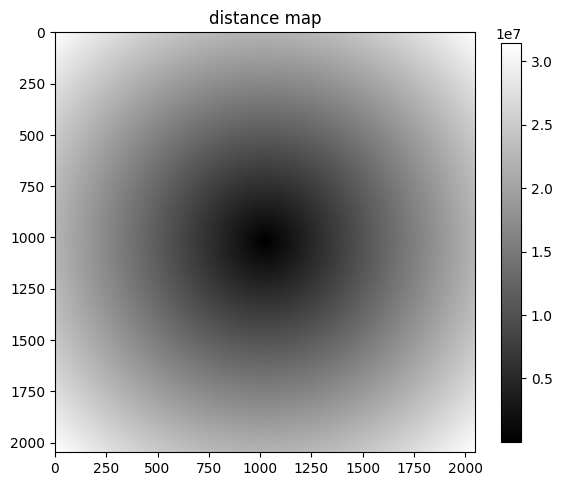

In [3]:
# create a distance map using the above stereo data (see doc_03_support)
distance_map = sup.create_distance_map(fits_file_list)

# view distance map, each pixel has its distance from the sun center (see doc_02_convenience)
con.show_1_image(distance_map,  title1="distance map")

In [4]:
# define distance to observer, assuming L1
dist_in_km=con.to_km(1, unit="L1")
print("L1 = ", dist_in_km, "km" )

L1 =  148097870.70000002 km


In [5]:
# create data distance data
r_plus, r_minus, l_plus, l_minus, tau_plus, tau_minus, x_plus, x_minus = cor.radial_position_ps(tb_data, pB_data, distance_map, dist_in_km)

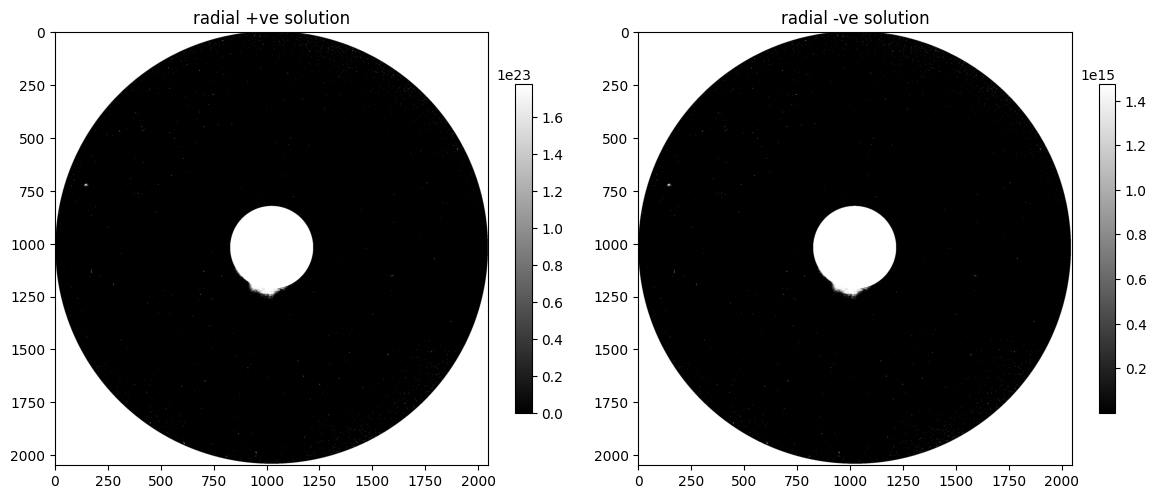

In [6]:
# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(r_plus, r_minus,  title1="radial +ve solution", title2="radial -ve solution")

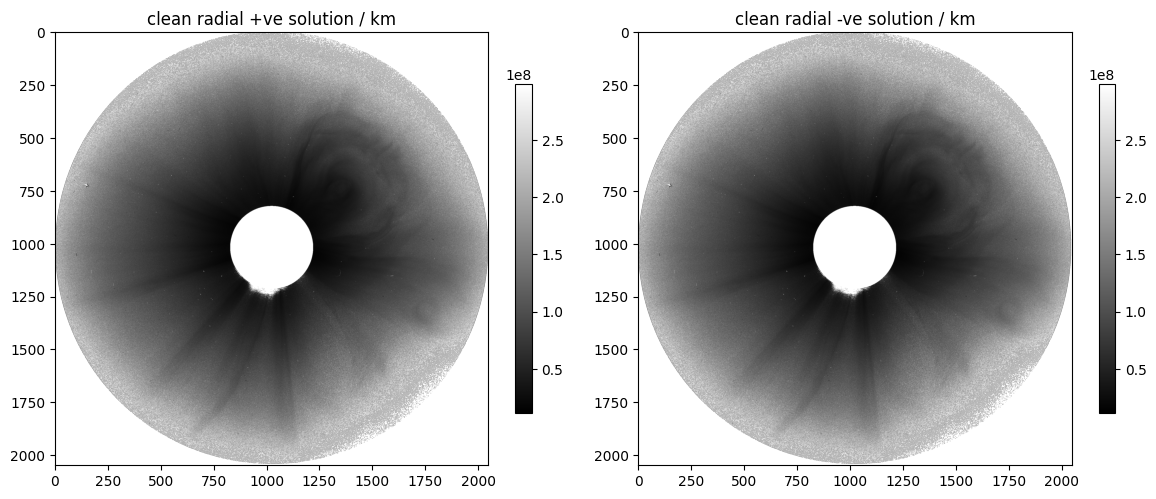

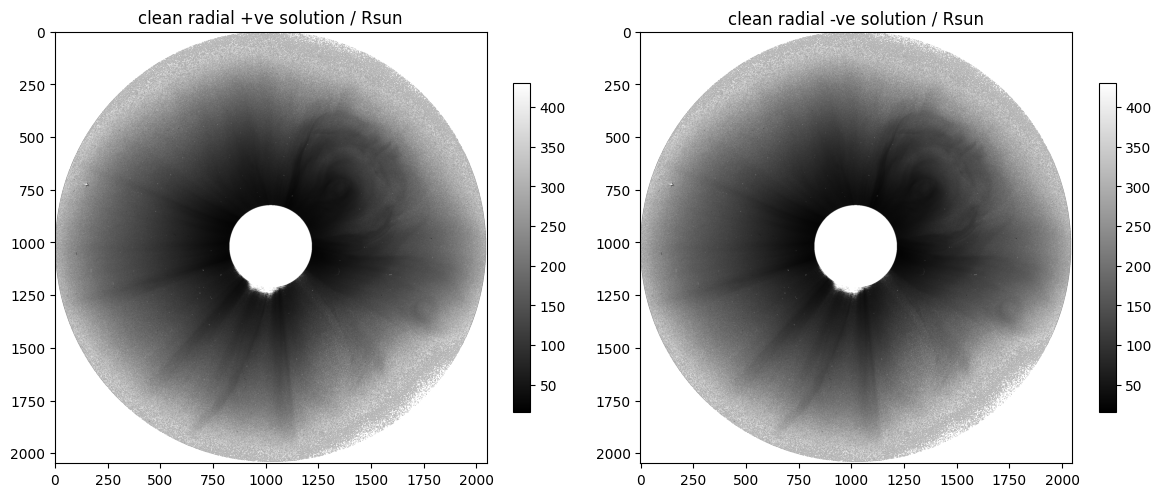

<function convenience.to_solar_radii(dist_km)>

In [7]:
# clean unrealistic values
dist_obs = au.to('km').value

max_factor=2.0
clean_r_plus = con.clean_distance(r_plus, dist_obs, max_factor=max_factor)
clean_r_minus = con.clean_distance(r_minus, dist_obs, max_factor=max_factor)

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(clean_r_plus, clean_r_minus,  title1="clean radial +ve solution / km", title2="clean radial -ve solution / km")

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(con.to_solar_radii(clean_r_plus), con.to_solar_radii(clean_r_minus),  title1="clean radial +ve solution / Rsun", title2="clean radial -ve solution / Rsun")
con.to_solar_radii


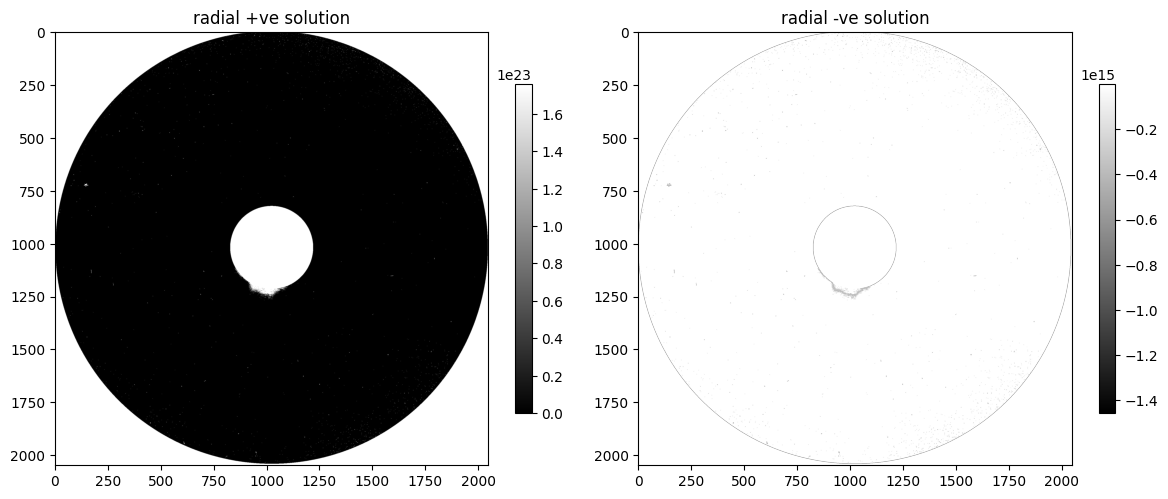

In [8]:
# display distance from the plane of the sky.
con.show_2_images(x_plus, x_minus,  title1="radial +ve solution", title2="radial -ve solution")

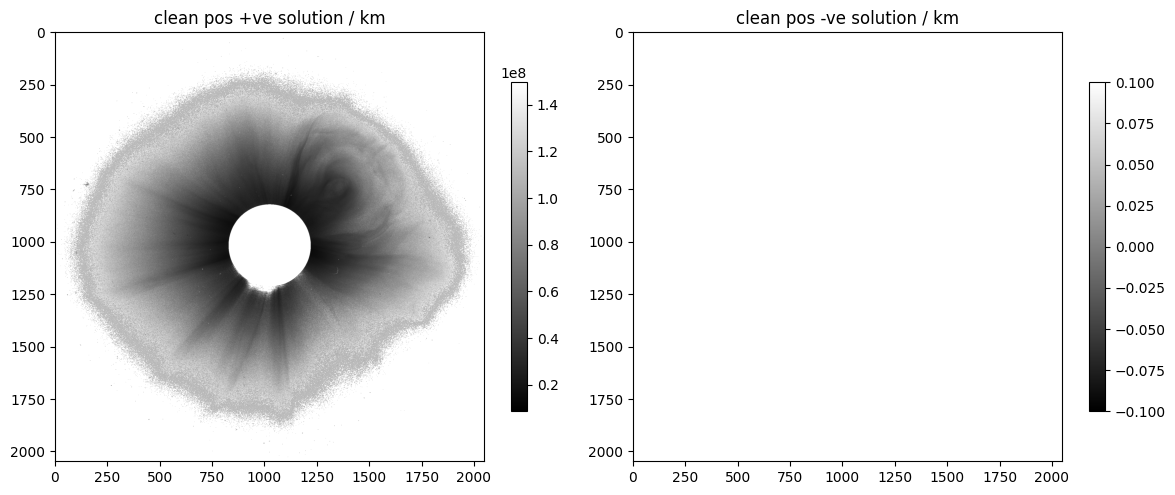

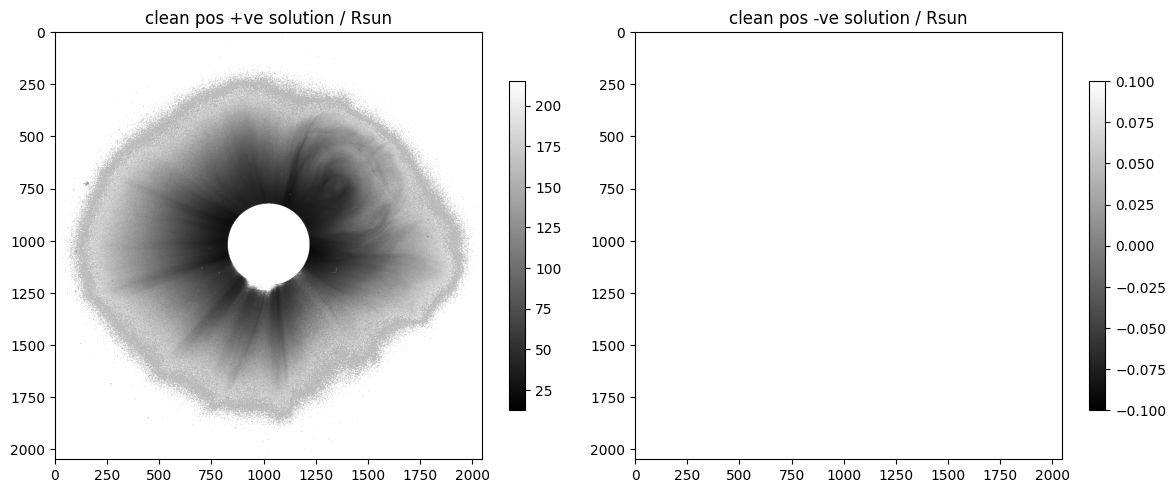

<function convenience.to_solar_radii(dist_km)>

In [9]:
# clean unrealistic values
dist_obs = au.to('km').value

max_factor=1.0
clean_x_plus = con.clean_distance(x_plus, dist_obs, max_factor=max_factor)
clean_x_minus = con.clean_distance(x_minus, dist_obs, max_factor=max_factor)

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(clean_x_plus, clean_x_minus,  title1="clean pos +ve solution / km", title2="clean pos -ve solution / km")

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(con.to_solar_radii(clean_x_plus), con.to_solar_radii(clean_x_minus),  title1="clean pos +ve solution / Rsun", title2="clean pos -ve solution / Rsun")
con.to_solar_radii

### Now with cleaned data

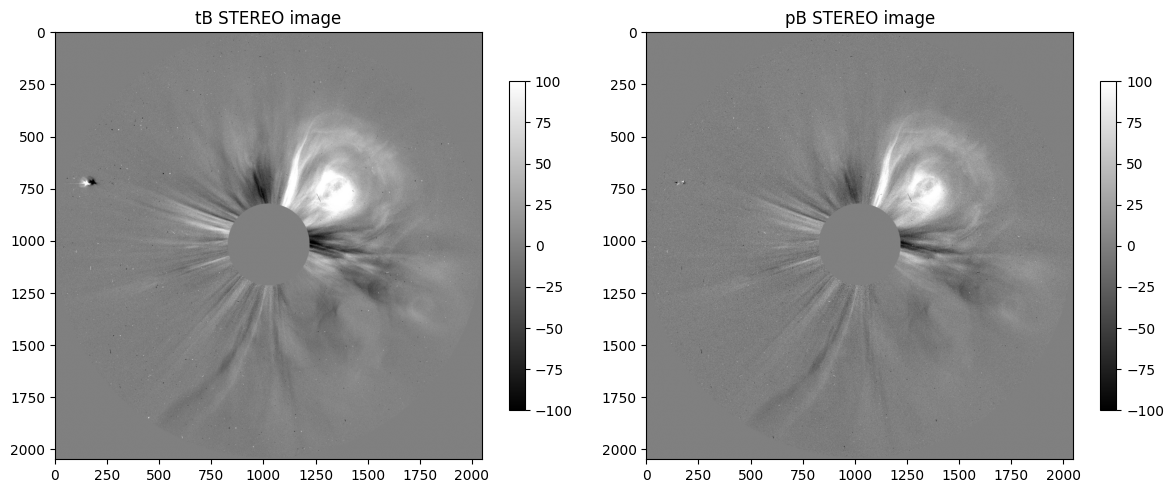

In [10]:
# import some data using import_data (see doc_03_support)
tb_data, pB_data, tb_header, pb_header = sup.import_data(fits_file_list, subtract_base_image=True, base_file_list=base_fits_file_list)

tb_data = np.clip(tb_data, -100, 100)
pB_data = np.clip(pB_data, -100, 100)

# view tB, pB pair, both have been masked by default (see doc_02_convenience)
con.show_2_images(tb_data, pB_data,  title1="tB STEREO image", title2="pB STEREO image")

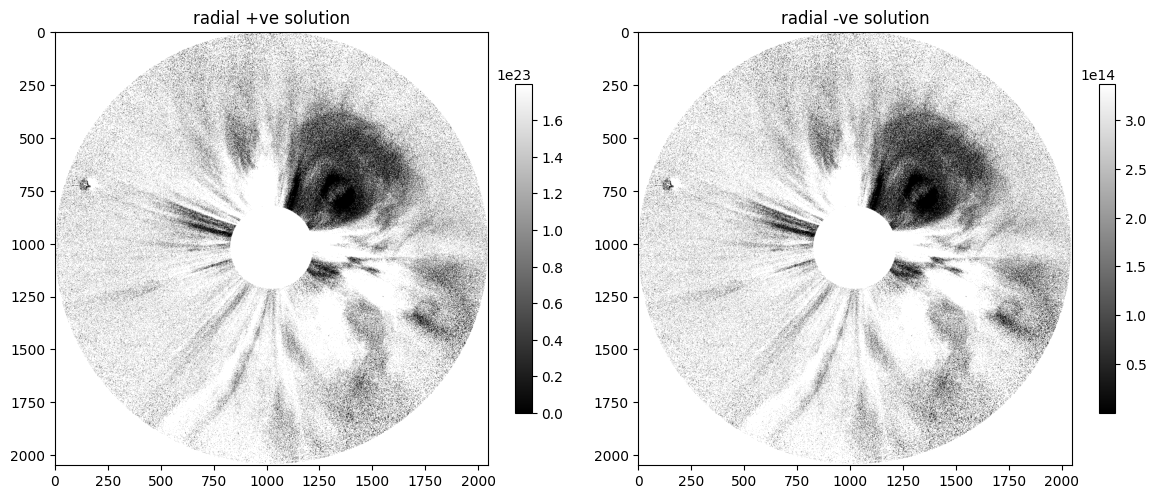

In [11]:
# create data distance maps
r_plus, r_minus, l_plus, l_minus, tau_plus, tau_minus, x_plus, x_minus = cor.radial_position_ps(tb_data, pB_data, distance_map, dist_in_km)

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(r_plus, r_minus,  title1="radial +ve solution", title2="radial -ve solution")

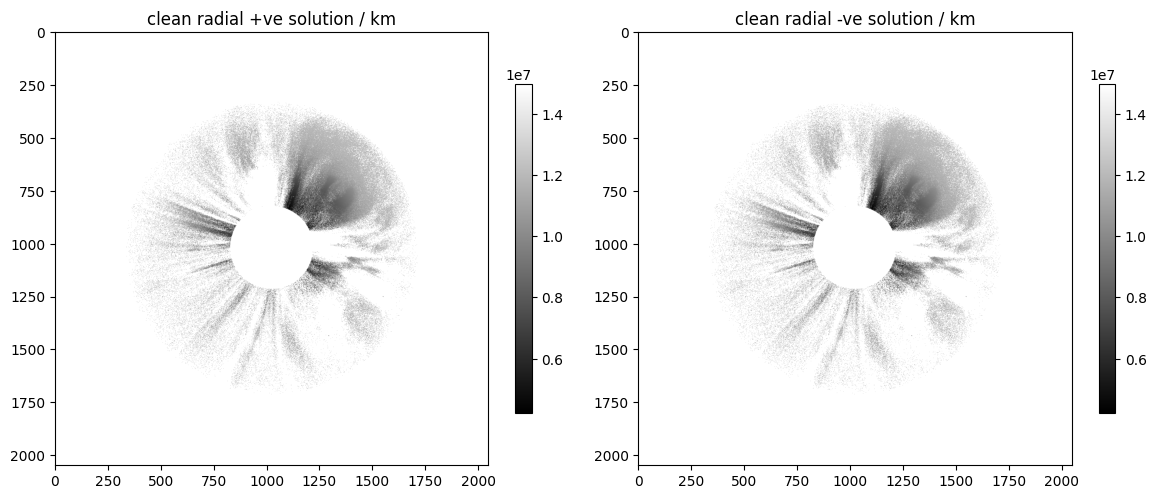

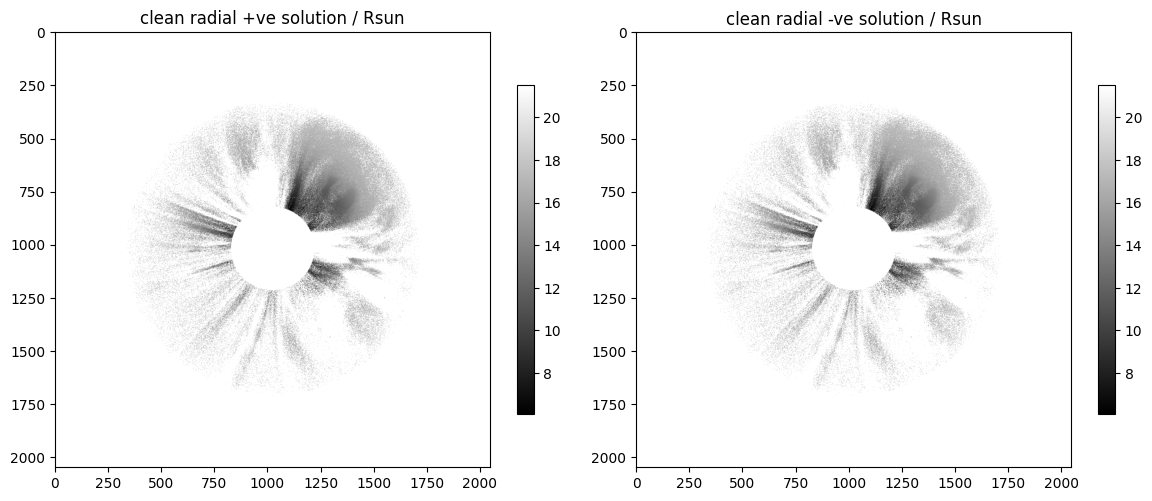

<function convenience.to_solar_radii(dist_km)>

In [12]:
# clean unrealistic values
dist_obs = au.to('km').value

max_factor=0.1
clean_r_plus = con.clean_distance(r_plus, dist_obs, max_factor=max_factor)
clean_r_minus = con.clean_distance(r_minus, dist_obs, max_factor=max_factor)

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(clean_r_plus, clean_r_minus,  title1="clean radial +ve solution / km", title2="clean radial -ve solution / km")

# display Heliocentric radial distances of the foreground (+) and background (-) solutions: distance from the Sun to the scattering point (foreground/background).
con.show_2_images(con.to_solar_radii(clean_r_plus), con.to_solar_radii(clean_r_minus),  title1="clean radial +ve solution / Rsun", title2="clean radial -ve solution / Rsun")
con.to_solar_radii